In [1]:
# imports
from utils import *
from paths import *

2021-11-30 16:51:48.920588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 16:51:48.923751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# read the configuration file and initialize random generators
cfg = read_config('configfiles/config.yaml')
seeds = read_config('configfiles/seed_config.yaml')
initalize_random_generators(seeds)

# Data loading and processing

In [3]:
# load dataset 
allData = load_data(cfg['dataset']) # This is the dataset of end use time series generated with STREaM
# select end uses of interest
endUses = ['StToilet','StShower','StFaucet','StClothesWasher', 'StDishwasher']

In [4]:
# Calculate percentage of time steps with overlapping end uses over time steps with positive water consumption
percOverlapp = overlapping_time_steps(allData, endUses)
print('Overlapping events are present for this percentage of time steps:')
print(percOverlapp)

Overlapping events are present for this percentage of time steps:
1.2881291002250634


In [5]:
# Extract end use events and statistics from aggregated TOTAL consumption time series
#
# ::: HINT: the total water consumption trajectory is the one where privacy filters apply!
#
extractedEvents = extractEventsFromTotal(allData)
#extractedEvents

In [6]:
# Splitting model input and output variables
X_test = extractedEvents[['Duration','Volume','Peak','Mode','Hour']]
y_test = extractedEvents[['Label']]

# Loading and running pre-trained end use classification model

In [7]:
# Load pre-trained model
loaded_model = joblib.load(os.path.join(RESULT_DIR,'EUclassifier_pre.sav'))
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
predictions = loaded_model.predict(X_test)

# Evaluating classification performance 

Text(0.5, 1.0, 'Confusion Matrix for the pre-trained LightGBM')

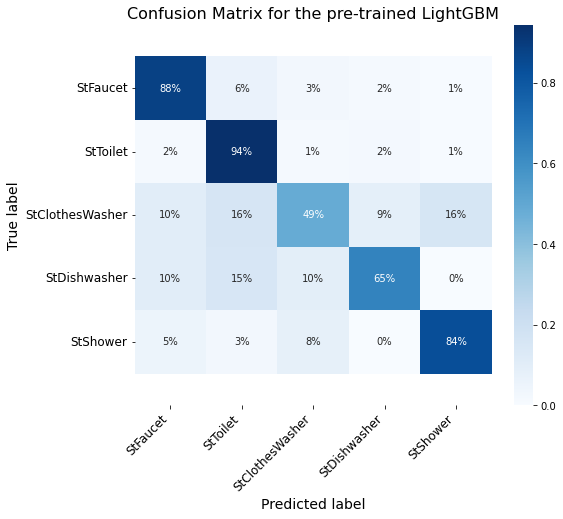

In [8]:
_, ax = get_confusion_matrix(y_test, predictions, plot=True)
ax.set_title('Confusion Matrix for the pre-trained LightGBM', fontsize=16)

In [9]:
# f1 scores
from sklearn.metrics import f1_score
FS = f1_score(y_test, predictions, average='micro')
print(FS)

0.8731663281426315
